# Maps

Connecting the Country names to ISO-3 codes to then map.

In [1]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_f = '../data/canonical/student_data.csv'
country_f = '../data/canonical/country_counts.csv'
map_f = '../data/maps/earth/ne_10m_admin_0_map_units.shp'

In [3]:
map_df = gpd.read_file(map_f)
map_df.columns

Index(['ABBREV', 'ABBREV_LEN', 'ADM0_A3', 'ADM0_A3_IS', 'ADM0_A3_UN',
       'ADM0_A3_US', 'ADM0_A3_WB', 'ADM0_DIF', 'ADMIN', 'BRK_A3', 'BRK_DIFF',
       'BRK_GROUP', 'BRK_NAME', 'CONTINENT', 'ECONOMY', 'FIPS_10_',
       'FORMAL_EN', 'FORMAL_FR', 'GDP_MD_EST', 'GDP_YEAR', 'GEOUNIT',
       'GEOU_DIF', 'GU_A3', 'HOMEPART', 'INCOME_GRP', 'ISO_A2', 'ISO_A3',
       'ISO_N3', 'LABELRANK', 'LASTCENSUS', 'LEVEL', 'LONG_LEN', 'MAPCOLOR13',
       'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'NAME', 'NAME_ALT', 'NAME_LEN',
       'NAME_LONG', 'NAME_SORT', 'NOTE_ADM0', 'NOTE_BRK', 'POP_EST',
       'POP_YEAR', 'POSTAL', 'REGION_UN', 'REGION_WB', 'SOVEREIGNT', 'SOV_A3',
       'SUBREGION', 'SUBUNIT', 'SU_A3', 'SU_DIF', 'TINY', 'TYPE', 'UN_A3',
       'WB_A2', 'WB_A3', 'WIKIPEDIA', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE',
       'featurecla', 'geometry', 'scalerank'],
      dtype='object')

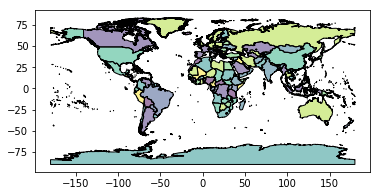

In [4]:
map_df.plot()

#### Merging Countries

Test and see if all the names are contained.

In [5]:
countries_canon = map_df.ADMIN.unique().tolist()
countries_data = ['Lebanon',
 'Jordan',
 'Israel',
 'Palestine',
 'Syria',
 'West Bank',
 'Bahrain',
 'Saudi Arabia',
 'Oman',
 'Gaza',
 'Libya',
 'Algeria',
 'Egypt',
 'Morocco',
 'Tunisia',
 'Bulgaria',
 'United States of America',
 'Russia',
 'Canada',
 'Yemen',
 'Kuwait',
 'Sudan',
 'France',
 'Turkey',
 'Iraq',
 'Armenia',
 'China',
 'Bangladesh',
 'Sri Lanka',
 'Pakistan',
 'Nepal',
 'India',
 'Kyrgyzstan']

for i in countries_data:
    if (i in countries_canon) == False:
        print ("{} contained:\tFalse".format(i))
    #print (i)

West Bank contained:	False
Gaza contained:	False


#### Plotting?

In [6]:
country_df = pd.read_csv(country_f)
country_df.head(2)

,country,count
0,United States of America,97
1,Russia,57


In [7]:
map_df = map_df[['ADMIN', 'geometry']]
map_df.columns = ['country', 'geometry']

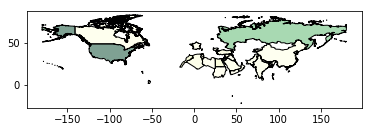

In [8]:
choro = map_df.merge(country_df, on='country')
choro.plot(column='count', cmap='YlGn');

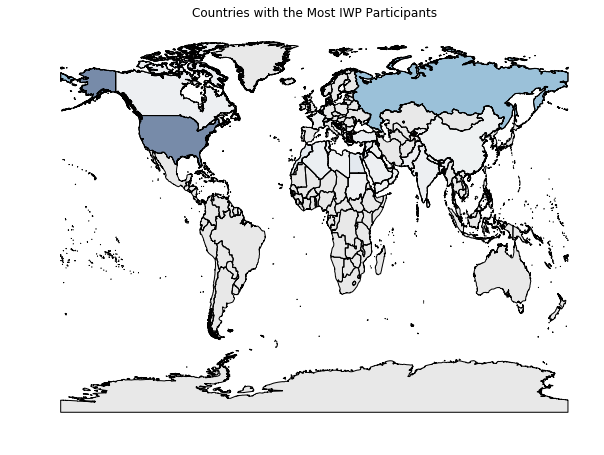

In [9]:
fig, ax = plt.subplots(1, figsize=(10,7.5))
base = map_df.plot(ax=ax, color='lightgray')
choro.plot(ax=base, column='count', cmap='Blues')

_ = ax.axis('off')
ax.set_title("Countries with the Most IWP Participants")

---

Student Plotting, points on map.

`
bank_points = df_banks[['lon', 'lat']].apply(lambda row: 
              Point(row["lon"], row["lat"]), axis=1)
geo_banks = gp.GeoDataFrame({"geometry": bank_points, 
			"bank_names": df_banks["bank_names"]})
`            

In [10]:
student_df = pd.read_csv(student_f)
student_df.columns

Index(['year', 'status', 'city', 'country', 'first_name', 'last_name', 'lat',
       'long'],
      dtype='object')

In [11]:
# Create data structure to plot student points
student_pts = student_df[['long', 'lat']].apply(lambda row: 
              Point(row["long"], row["lat"]), axis=1)
students_geo = gpd.GeoDataFrame({
    "geometry": student_pts,
    "name": student_df['first_name']
})

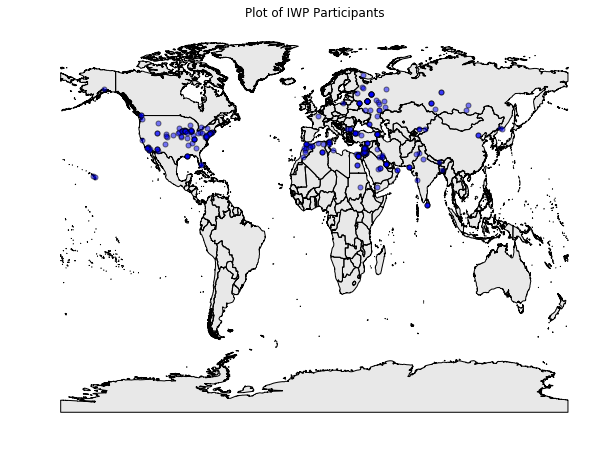

In [12]:
# Plot participants
fig, ax = plt.subplots(1, figsize=(10,7.5))
base = map_df.plot(ax=ax, color='lightgray')
students_geo.plot(ax=base, marker="o", 
             mfc="blue", markersize=5, 
             markeredgecolor="black", alpha=0.5)
_ = ax.axis('off')
ax.set_title("Plot of IWP Participants")